In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('all_stocks_5yr.csv')

In [47]:
data_AAL = data[data['Name'] == 'AAL']
data_AAL.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL
1258,2018-02-07,50.91,51.98,50.89,51.40,4845831,AAL


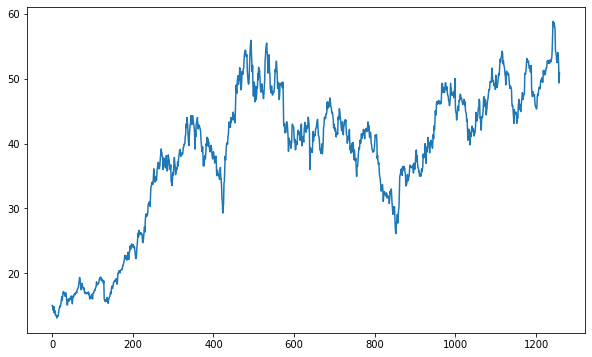

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data_AAL['open'])



split the open price into training and validation data

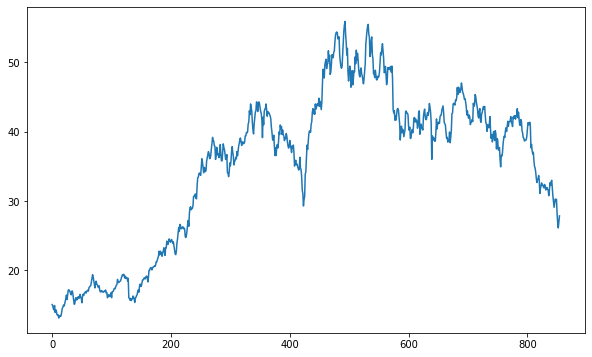

In [59]:
split_time = 855
plt.figure(figsize=(10, 6))
time = np.arange(split_time)
plt.plot(time, data_AAL['open'][:split_time])

In [92]:
open_price = data_AAL['open']
time = np.arange(len(open_price))
x_train = open_price[:split_time]
time_train = time[:split_time]

x_valid = open_price[split_time:]
time_valid = time[split_time:]

In [98]:
def moving_average_forecast(series, window_size):
    
  mov = np.cumsum(series)
  mov[window_size:] = mov[window_size:].reset_index(drop = True) - mov[:-window_size].reset_index(drop = True)
  return mov[window_size - 1:-1].reset_index(drop = True) / window_size

In [44]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

Naive Forecast

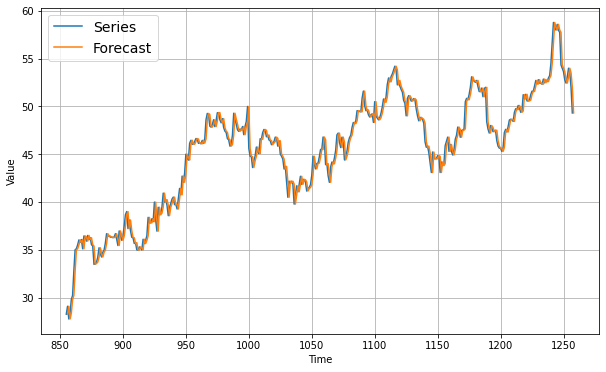

In [58]:
naive_forecast = open_price[split_time - 1:-1]
plt.figure(figsize=(10, 6))
plot_series(time_val, x_val, start=0,end=403, label="Open_price")
plot_series(time_val, naive_forecast, start=1,end=404, label="Forecast")

2.3363961716172215

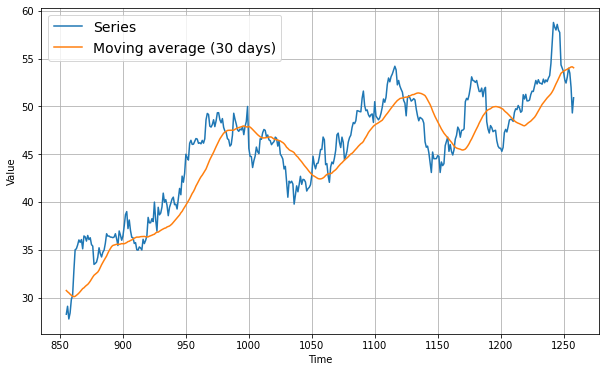

In [113]:
window_size = 30
moving_avg = moving_average_forecast(open_price, window_size)[split_time - window_size:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Open_price")
plot_series(time_valid, moving_avg, label=f"Moving average ({window_size} days)")

import keras
keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy()

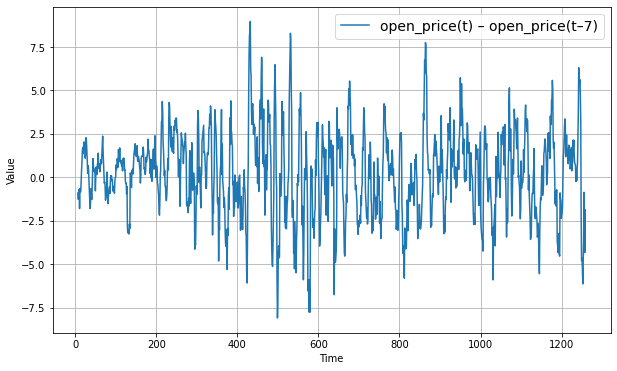

In [129]:
seasonarity = 7
diff_price = (open_price[seasonarity:].reset_index(drop = True) - open_price[:-seasonarity]).reset_index(drop = True)
diff_time = time[seasonarity:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_price, label=f"open_price(t) – open_price(t–{seasonarity})")
plt.show()

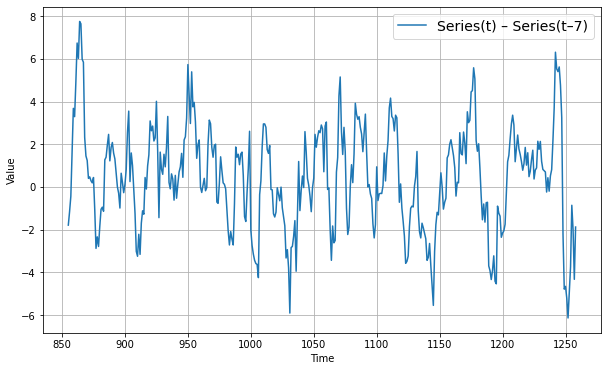

In [130]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_price[split_time - seasonarity:], label=f"Open_price(t) – Open_price(t–{seasonarity})")
plt.show()

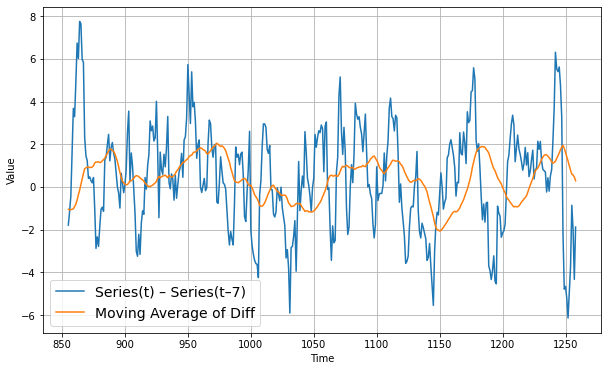

In [131]:
diff_moving_avg = moving_average_forecast(diff_price, window_size)[split_time - seasonarity - window_size:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_price[split_time - seasonarity:], label=f"Open_price(t) – Open_price(t–{seasonarity})")
plot_series(time_valid, diff_moving_avg, label="Moving Average of Diff")
plt.show()

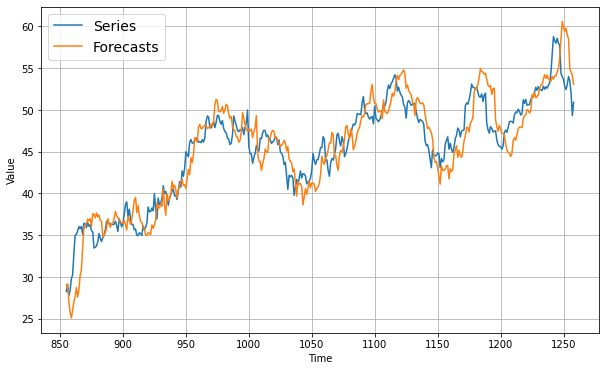

2.0076177557755774

In [132]:
diff_moving_avg_plus_past = open_price[split_time - seasonarity:-seasonarity].reset_index(drop = True) + diff_moving_avg.reset_index(drop = True)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="open_price")
plot_series(time_valid, diff_moving_avg_plus_past, label="Forecasts")
plt.show()
keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy()

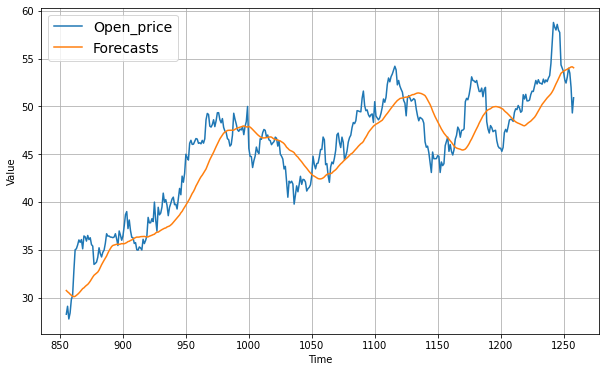

2.336396171617166

In [155]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(open_price[split_time - seasonarity- window_size:-seasonarity], window_size) + diff_moving_avg.reset_index(drop = True)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Open_price")
plot_series(time_valid, diff_moving_avg_plus_smooth_past, label="Forecasts")
plt.show()
keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy()